In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2) #где более двух пропусков - удаляем

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-1.329860,NaN,NaN
1,-0.788357,NaN,NaN
2,1.107054,NaN,0.069455
3,1.336807,NaN,-0.428680
4,0.960078,1.117670,1.191304
5,1.282890,-0.924803,-1.398298
6,0.844323,0.034248,0.585498


In [16]:
df.fillna(0)

,0,1,2
0,-1.329860,0.000000,0.000000
1,-0.788357,0.000000,0.000000
2,1.107054,0.000000,0.069455
3,1.336807,0.000000,-0.428680
4,0.960078,1.117670,1.191304
5,1.282890,-0.924803,-1.398298
6,0.844323,0.034248,0.585498


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.329860,0.500000,0.000000
1,-0.788357,0.500000,0.000000
2,1.107054,0.500000,0.069455
3,1.336807,0.500000,-0.428680
4,0.960078,1.117670,1.191304
5,1.282890,-0.924803,-1.398298
6,0.844323,0.034248,0.585498


In [19]:
df.fillna(method="bfill") #снизу вверх заполняем 

,0,1,2
0,-1.329860,1.117670,0.069455
1,-0.788357,1.117670,0.069455
2,1.107054,1.117670,0.069455
3,1.336807,1.117670,-0.428680
4,0.960078,1.117670,1.191304
5,1.282890,-0.924803,-1.398298
6,0.844323,0.034248,0.585498


In [20]:
df.fillna(method="bfill", limit=2) #лимит на две строки вверх

,0,1,2
0,-1.329860,NaN,0.069455
1,-0.788357,NaN,0.069455
2,1.107054,1.117670,0.069455
3,1.336807,1.117670,-0.428680
4,0.960078,1.117670,1.191304
5,1.282890,-0.924803,-1.398298
6,0.844323,0.034248,0.585498


In [34]:
df.fillna(data.mean()) #заполняем средним

,0,1,2
0,-0.554254,6.500000,3.000000
1,2.044001,6.500000,3.000000
2,-0.406626,6.500000,0.328056
3,1.049602,6.500000,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


In [35]:
 df.fillna(data.median()) #заполняем медианой, более устойчива к выбросам 

,0,1,2
0,-0.554254,6.500000,3.000000
1,2.044001,6.500000,3.000000
2,-0.406626,6.500000,0.328056
3,1.049602,6.500000,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


Медиана более устойчива к выбросам

In [21]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0]) #с вероятностью 10 % будет выброс, СКО = 10
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

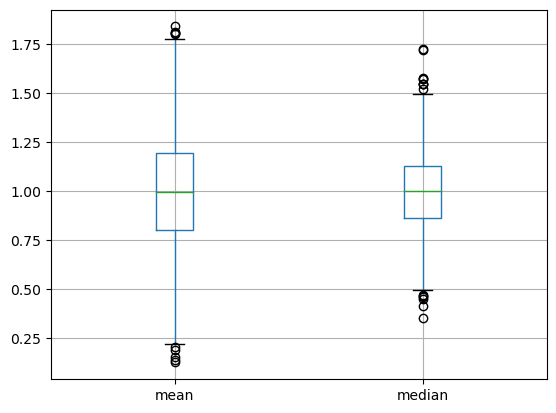

In [22]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32) #признак, если есть пропуск = 1 
df

,0,1,2,2 is nan
0,-1.329860,NaN,NaN,1
1,-0.788357,NaN,NaN,1
2,1.107054,NaN,0.069455,0
3,1.336807,NaN,-0.428680,0
4,0.960078,1.117670,1.191304,0
5,1.282890,-0.924803,-1.398298,0
6,0.844323,0.034248,0.585498,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [122]:
(data == "male").astype(np.int32) #кодирование признака

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [28]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [29]:
enc = OrdinalEncoder() #рандомное кодирование, логики - нет. Лучше использовать логический метод
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [145]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [153]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [170]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [31]:
from sklearn.preprocessing import PolynomialFeatures #1, а, и, а**2, аи, и**2

In [34]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [35]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

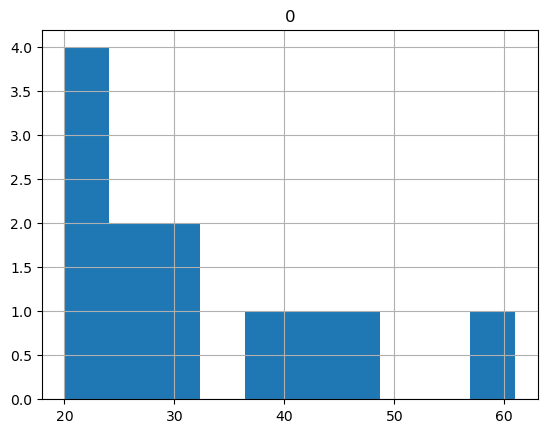

In [36]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [37]:
bins = [18, 25, 35, 60, 100] #интервалы для группировки
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [38]:
age_categories.codes #преобразование данных в категории возраста по интервалам групп

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler() #нормализует столбец от 0 до 1
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [41]:
scaler = StandardScaler() #отнимает из каждого наблюдение среднее и делить на станд откл
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

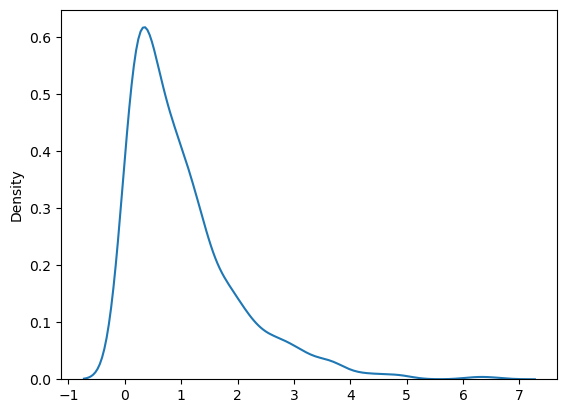

In [42]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000) #генерир 1000 наблюд по экспон распред
sns.distplot(data, hist= False, kde= True)

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

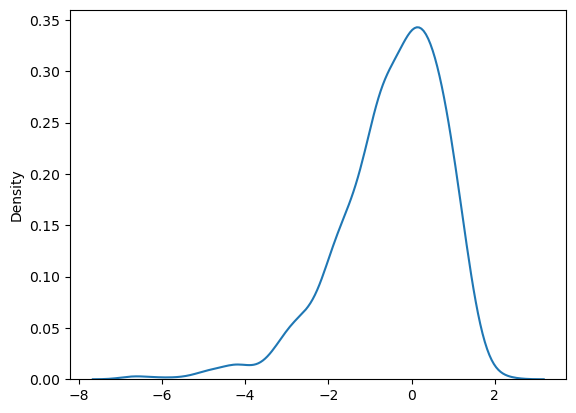

In [179]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True) #логарифмирование данных для нормализации 

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

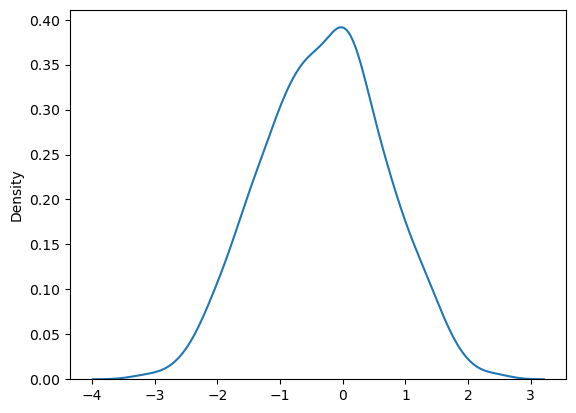

In [43]:
transformed_data, best_lambda = boxcox(data) 
#примерении способа для норамлизации распределения. С помощью метода макс правдоподобия, возводит распределение в степень лямбда - 1 и делит на лямбда для лямбда не равного 0, иначе логарифм х
sns.distplot(transformed_data, hist=False , kde=True)

In [44]:
best_lambda

0.28247792333502064

# Домашнее задание

In [200]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [201]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

### ПРЕДОБРАБОТКА ДАННЫХ

In [202]:
#дубликатов по строкам - нет
df.drop_duplicates()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [203]:
#дубликатов по столбцам тоже нет
df.T.drop_duplicates().T

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0.0,9.0,-1.0,36457.0,9.0,4.3,0.0,3.0,4.0,2006.0,...,1.0,2.0,13.0,40.0,2018.0,16.0,3.0,0.0,1.0,2360.0
1,2.0,3.0,-1.0,44872.0,8.0,-1.0,3.0,7.0,4.0,1982.0,...,4.0,2.0,13.0,108.0,1993.0,34.0,3.0,0.0,1.0,3060.0
2,4.0,3.0,-1.0,55927.0,16.0,4.2,0.0,4.0,5.0,2014.0,...,4.0,2.0,13.0,55.0,2019.0,35.0,3.0,0.0,1.0,2648.0
3,5.0,0.0,-1.0,41405.0,10.3,-1.0,0.0,4.0,4.0,2000.0,...,4.0,2.0,13.0,55.0,2003.0,10.0,3.0,0.0,1.0,2513.0
4,7.0,8.0,-1.0,22523.0,19.0,-1.0,0.0,4.0,8.0,2000.0,...,4.0,1.0,13.0,62.0,2005.0,10.0,3.0,0.0,1.0,2703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224.0,9.0,-1.0,34558.0,11.2,6.6,0.0,4.0,4.0,2004.0,...,1.0,2.0,13.0,47.0,2016.0,15.0,3.0,0.0,1.0,2510.0
43241,61225.0,3.0,-1.0,38268.0,9.6,5.8,0.0,4.0,2.0,2013.0,...,4.0,2.0,13.0,65.0,2015.0,10.0,3.0,0.0,1.0,2808.0
43242,61226.0,3.0,-1.0,8958.0,10.0,9.3,0.0,4.0,4.0,1991.0,...,4.0,2.0,13.0,55.0,1999.0,16.0,3.0,0.0,1.0,2520.0
43243,61227.0,3.0,-1.0,20293.0,8.5,-1.0,0.0,5.0,4.0,2002.0,...,1.0,2.0,13.0,70.0,2004.0,28.0,3.0,0.0,1.0,2755.0


Странный столбец index, попробуем без него проверить данные на наличие дубликатов

In [204]:
#дубликатов по строкам - нет
df['index'].nunique()

43245

In [205]:
#пропусков тоже -нет 
df.isna().sum()

index                             0
back-suspension                   0
battery-capacity                  0
charge-time                       0
compression                       0
consumption-mixed                 0
cylinders-order                   0
cylinders-value                   0
engine-feeding                    0
engine-start                      0
engine-stop                       0
engine-type                       0
gear-type                         0
luxury                            0
max-speed                         0
power-electro-kw                  0
supply-system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto-premiere      0
configurations_back-wheel-base    0
configurations_front-brake        0
configurations_safety-rating      0
configurations_seats              0
configurations_tank-volume        0
supergen_year-stop                0
models_country-from         

In [206]:
list_columns = df.columns.tolist()
list_columns

['index',
 'back-suspension',
 'battery-capacity',
 'charge-time',
 'compression',
 'consumption-mixed',
 'cylinders-order',
 'cylinders-value',
 'engine-feeding',
 'engine-start',
 'engine-stop',
 'engine-type',
 'gear-type',
 'luxury',
 'max-speed',
 'power-electro-kw',
 'supply-system',
 'valves',
 'valvetrain',
 'weight',
 'configurations_auto-premiere',
 'configurations_back-wheel-base',
 'configurations_front-brake',
 'configurations_safety-rating',
 'configurations_seats',
 'configurations_tank-volume',
 'supergen_year-stop',
 'models_country-from',
 'models_group',
 'models_light-and-commercial',
 'models_male',
 'target']

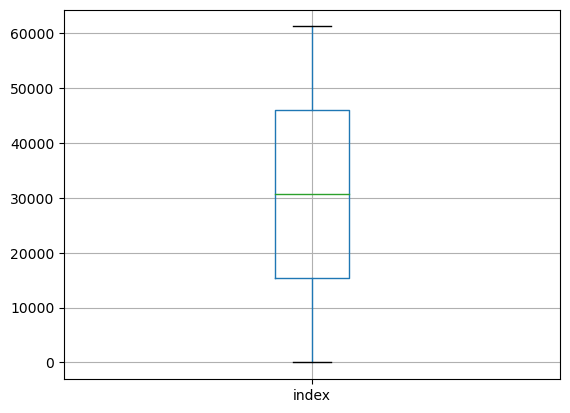

------------------------------------------------------------------------------


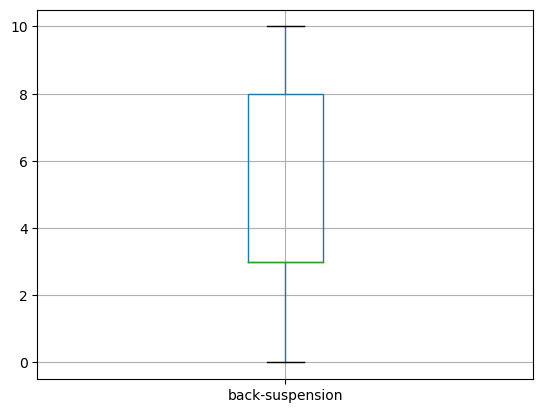

------------------------------------------------------------------------------


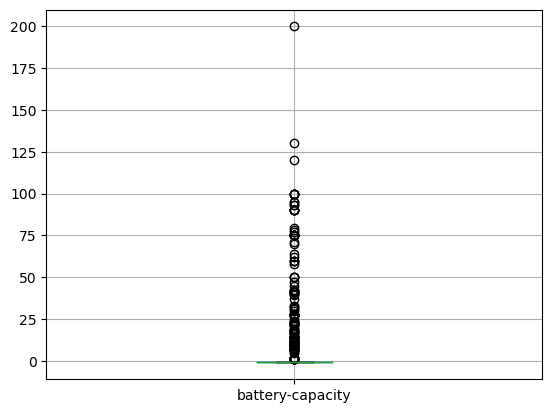

------------------------------------------------------------------------------


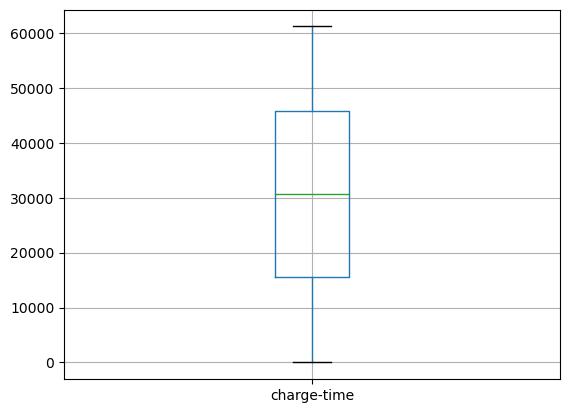

------------------------------------------------------------------------------


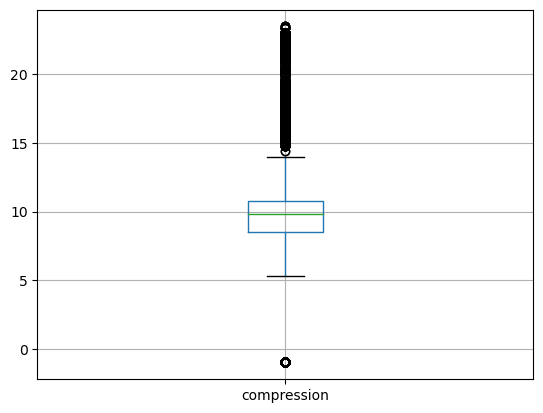

------------------------------------------------------------------------------


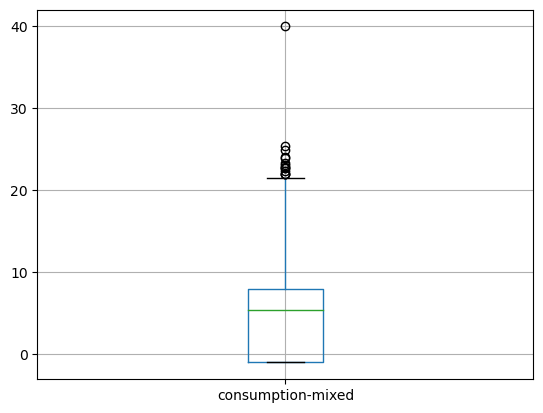

------------------------------------------------------------------------------


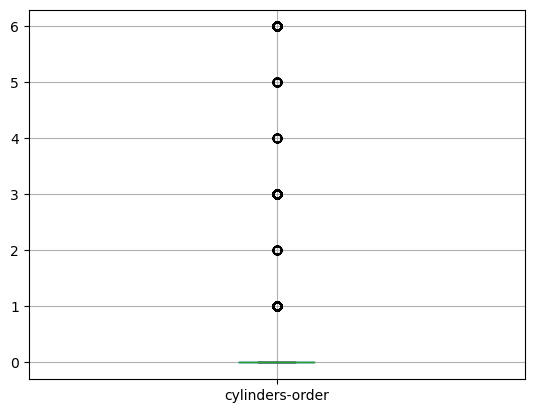

------------------------------------------------------------------------------


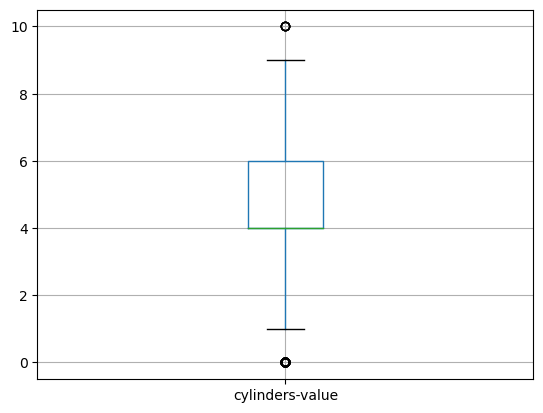

------------------------------------------------------------------------------


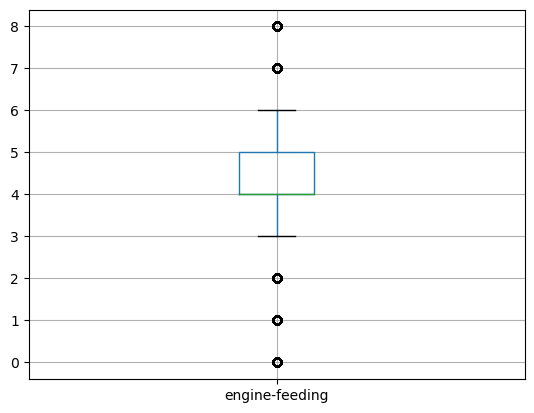

------------------------------------------------------------------------------


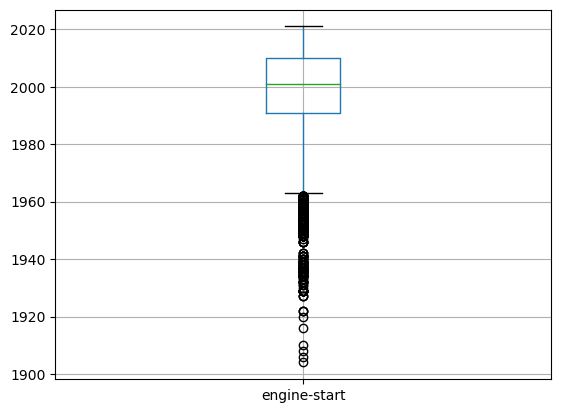

------------------------------------------------------------------------------


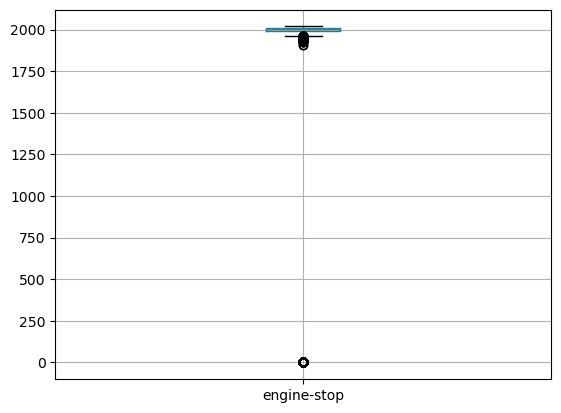

------------------------------------------------------------------------------


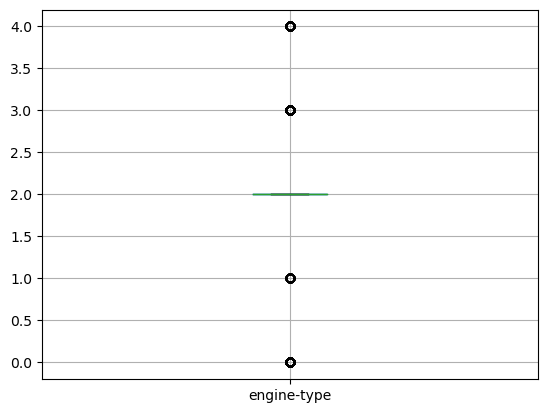

------------------------------------------------------------------------------


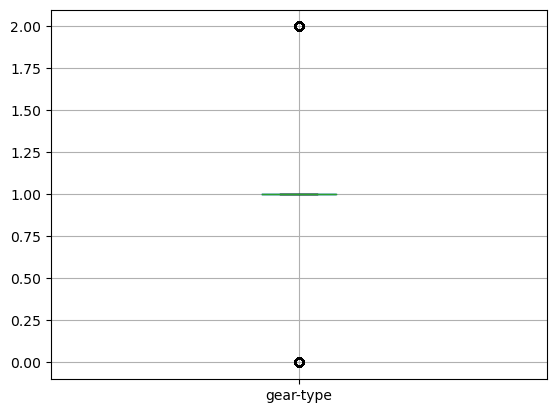

------------------------------------------------------------------------------


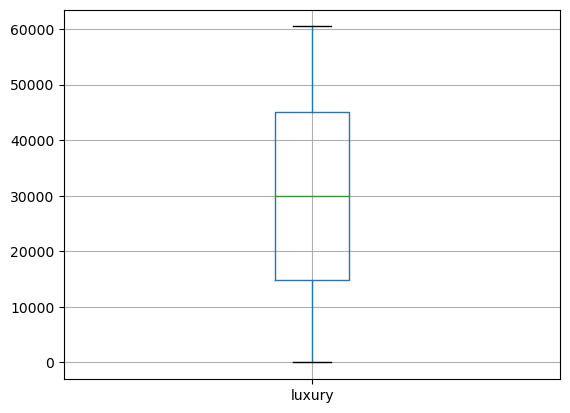

------------------------------------------------------------------------------


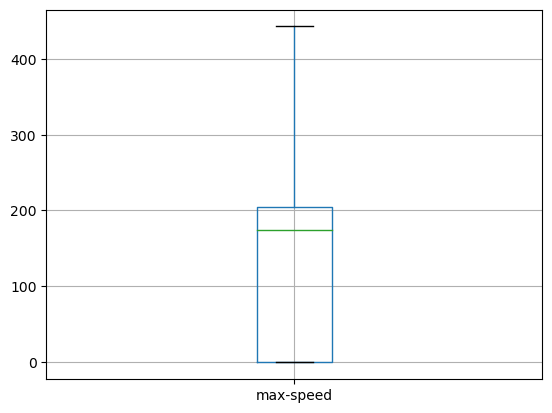

------------------------------------------------------------------------------


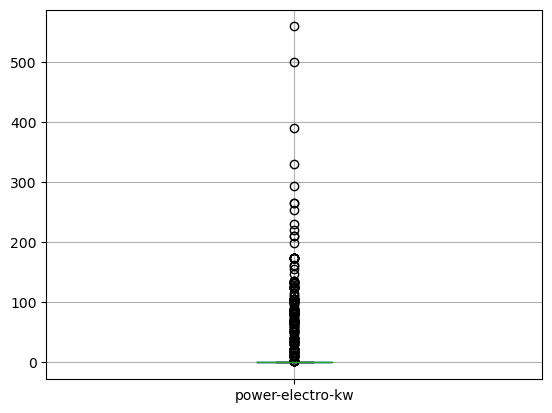

------------------------------------------------------------------------------


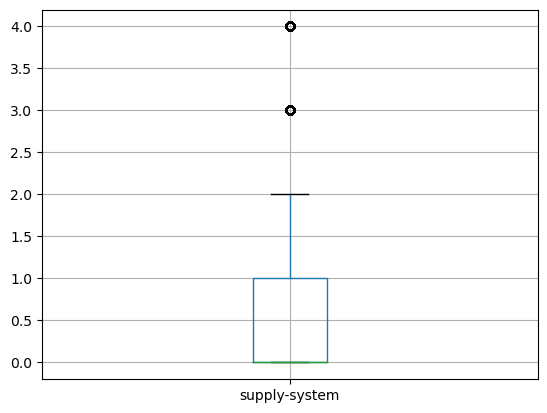

------------------------------------------------------------------------------


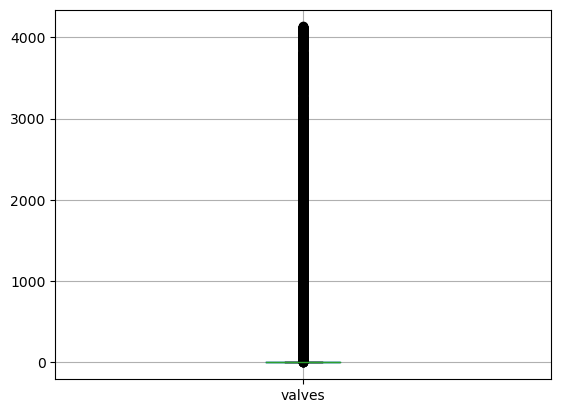

------------------------------------------------------------------------------


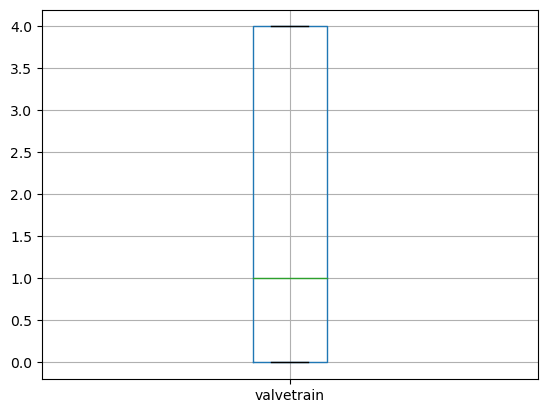

------------------------------------------------------------------------------


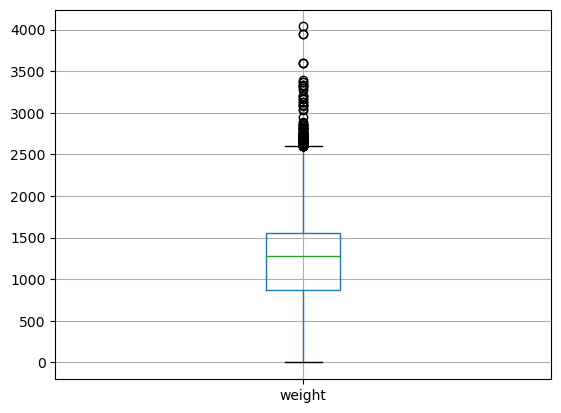

------------------------------------------------------------------------------


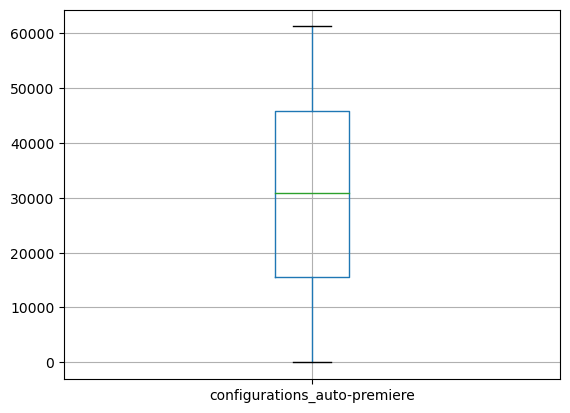

------------------------------------------------------------------------------


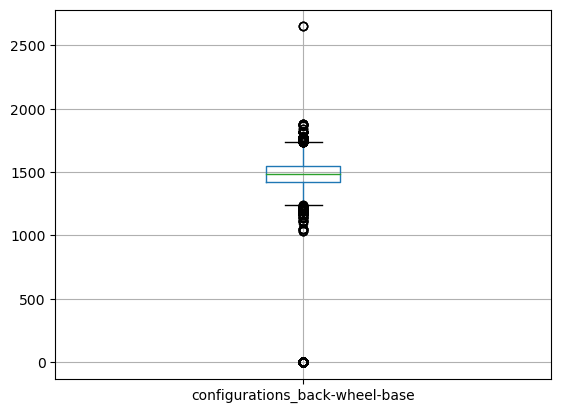

------------------------------------------------------------------------------


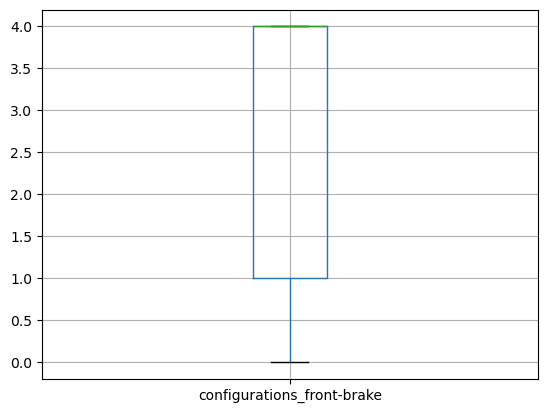

------------------------------------------------------------------------------


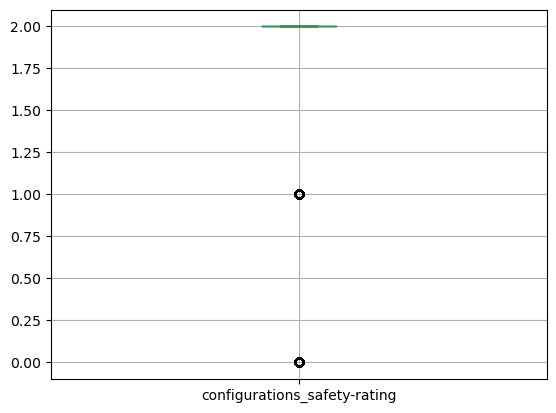

------------------------------------------------------------------------------


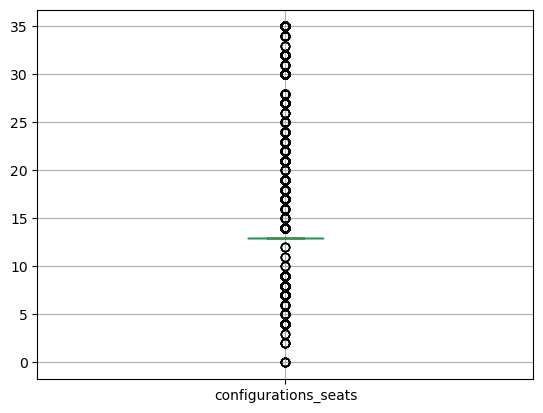

------------------------------------------------------------------------------


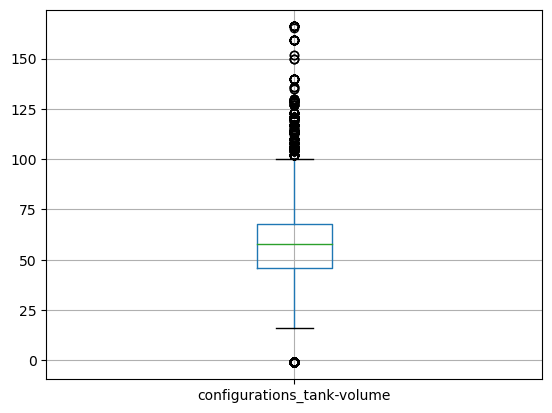

------------------------------------------------------------------------------


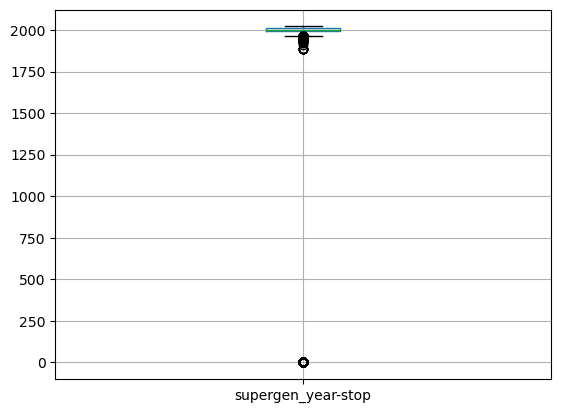

------------------------------------------------------------------------------


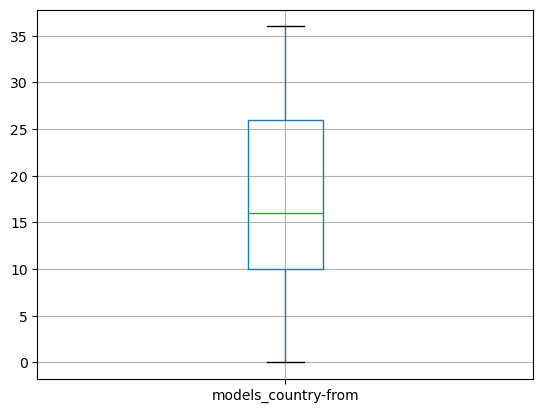

------------------------------------------------------------------------------


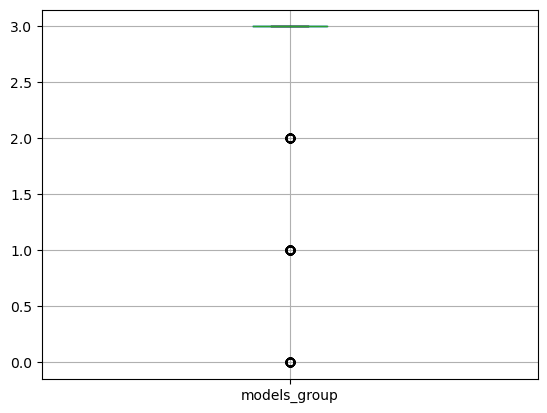

------------------------------------------------------------------------------


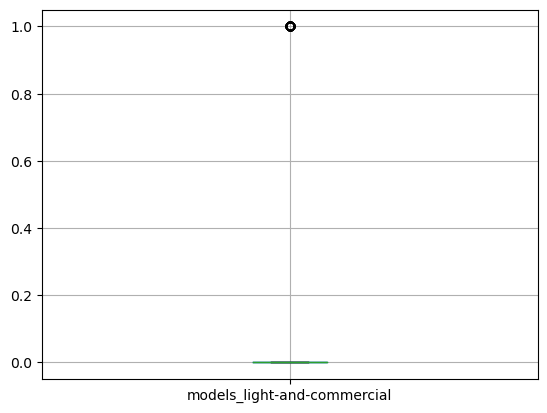

------------------------------------------------------------------------------


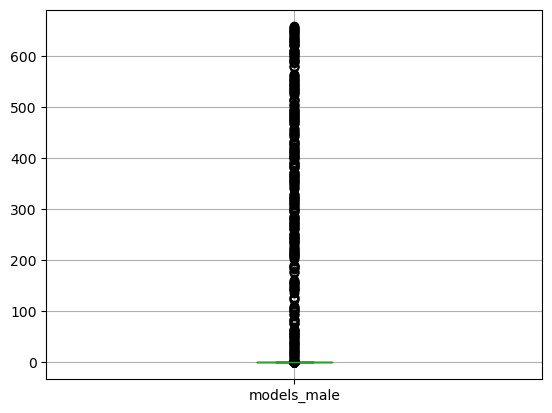

------------------------------------------------------------------------------


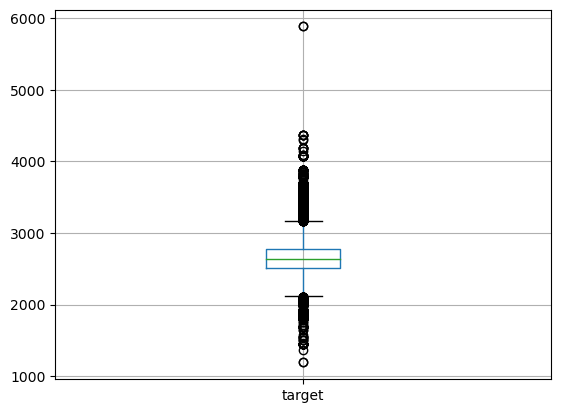

------------------------------------------------------------------------------


In [207]:
for i in list_columns:
    df.boxplot(column=[i])
    plt.show()
    print('------------------------------------------------------------------------------')
#исключая из данных столбцы с категориальными переменными, данными о годах и те, в которых нет выбросов получаем след. список:

In [208]:
list_new = ['battery-capacity',
 'compression',
 'consumption-mixed',
 'max-speed',
 'power-electro-kw',
 'valves',
 'weight',
 'configurations_back-wheel-base',
 'configurations_tank-volume',
 'models_male',
 'target']

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


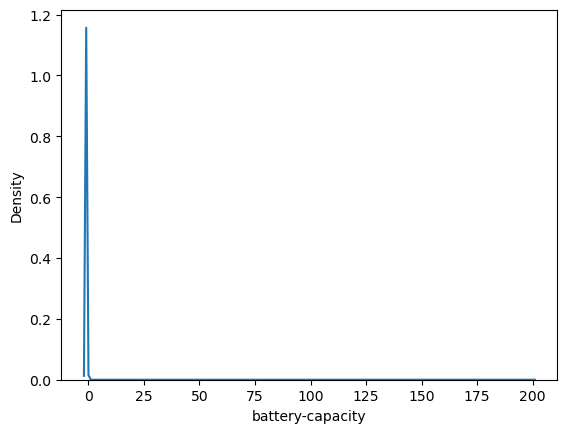

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


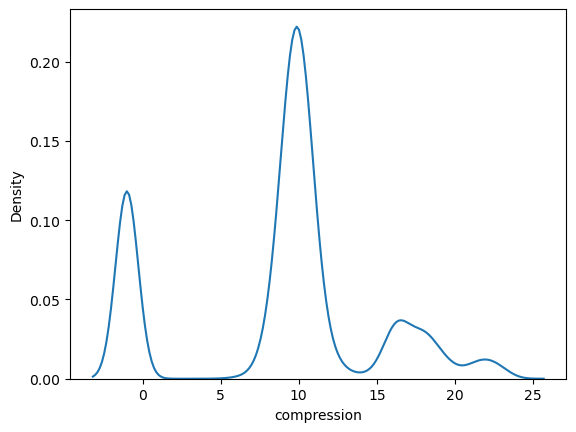

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


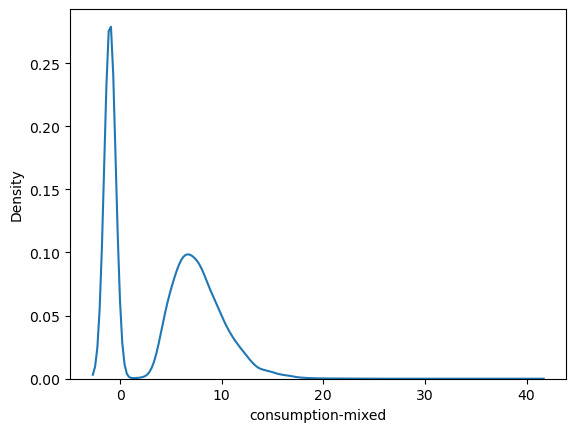

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


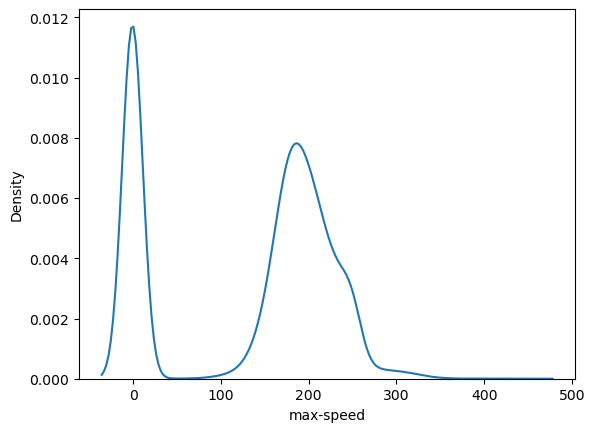

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


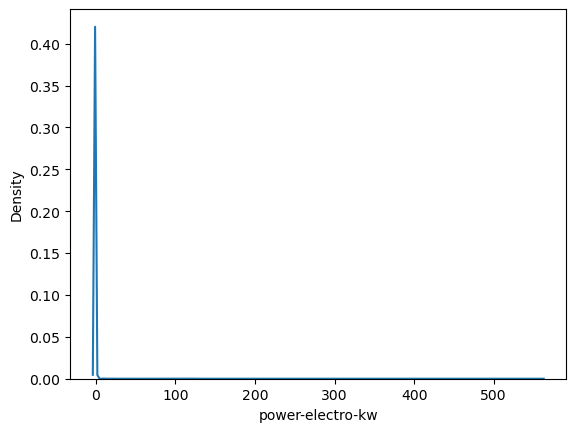

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


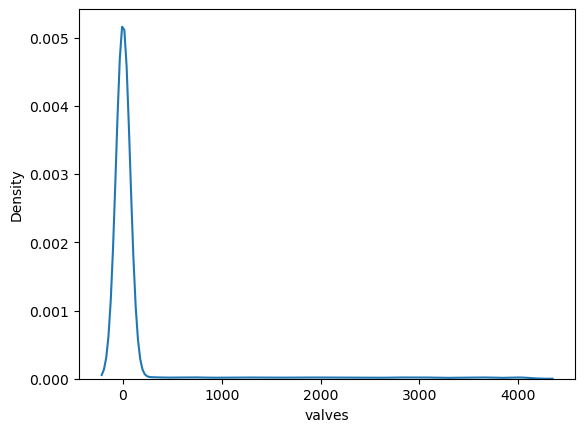

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


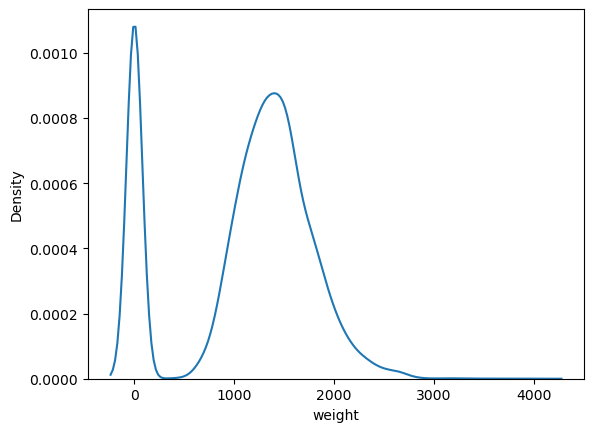

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


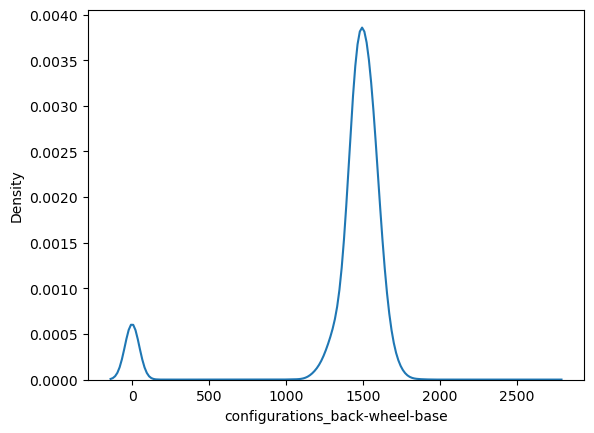

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


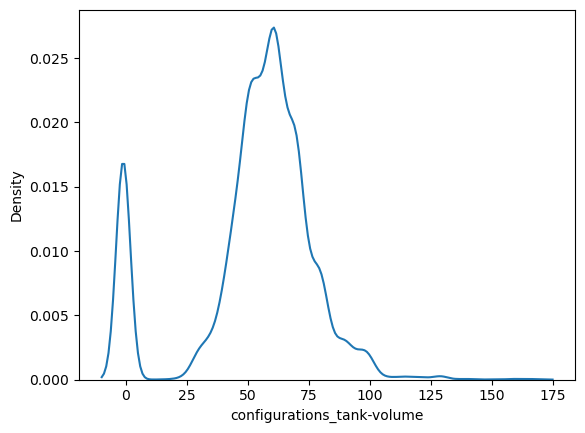

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


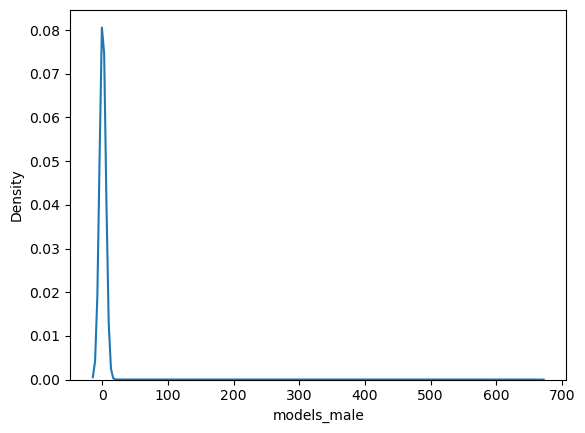

------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


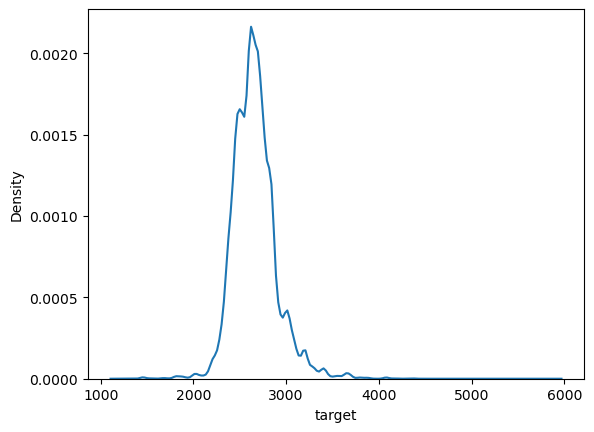

------------------------------------------------------------------------------


In [209]:
for i in list_new:
    sns.distplot(df[i], hist= False, kde= True)
    plt.show()
    print('------------------------------------------------------------------------------')

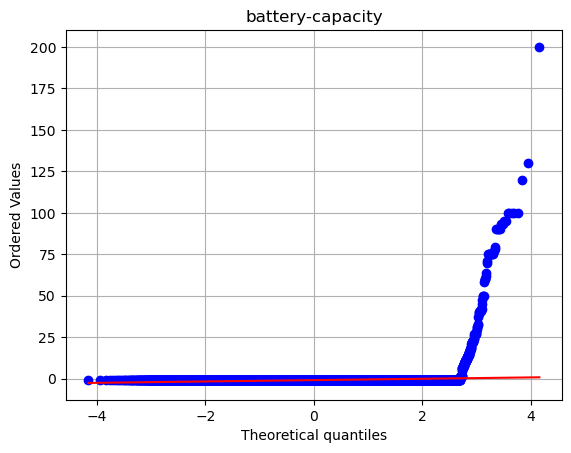

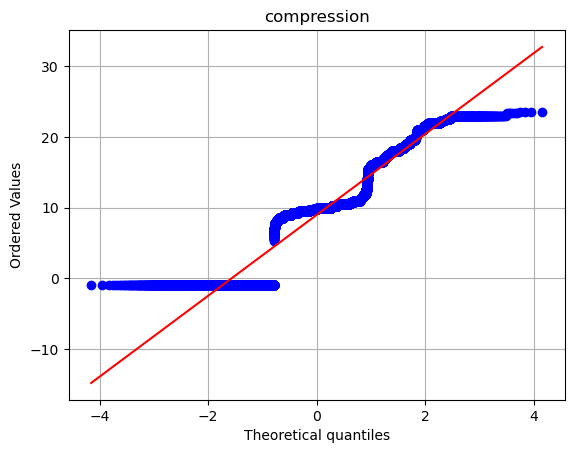

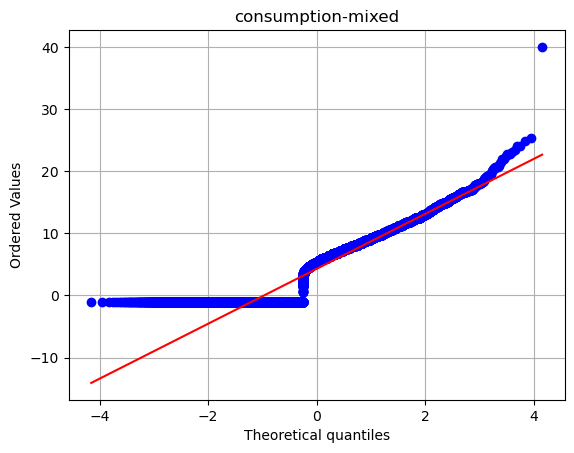

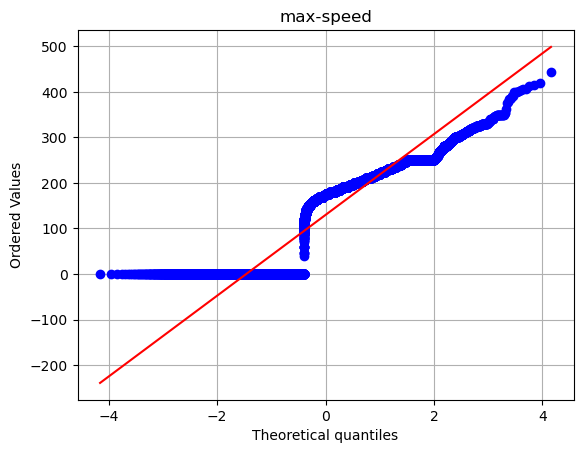

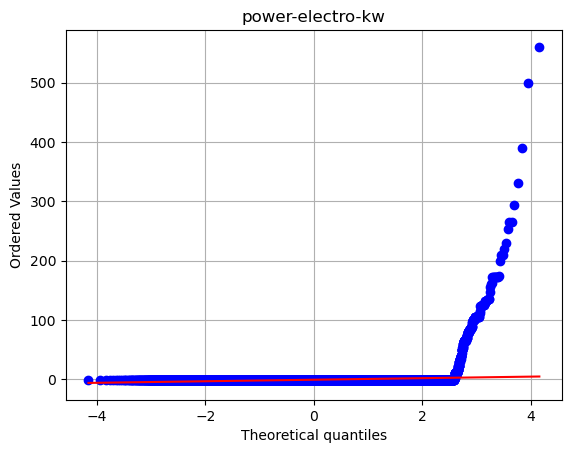

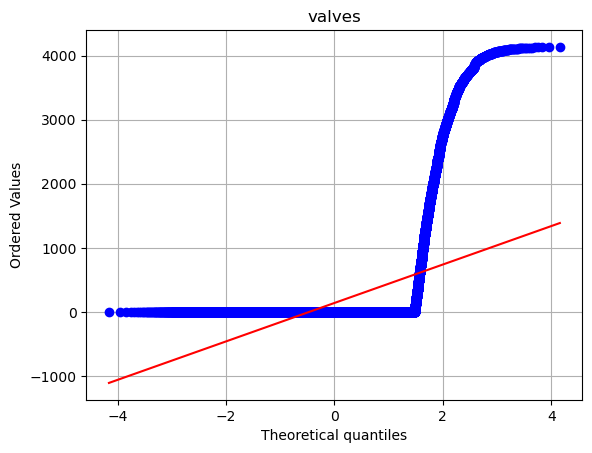

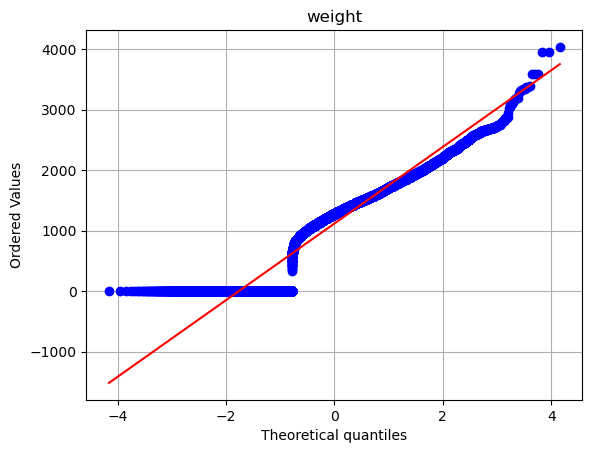

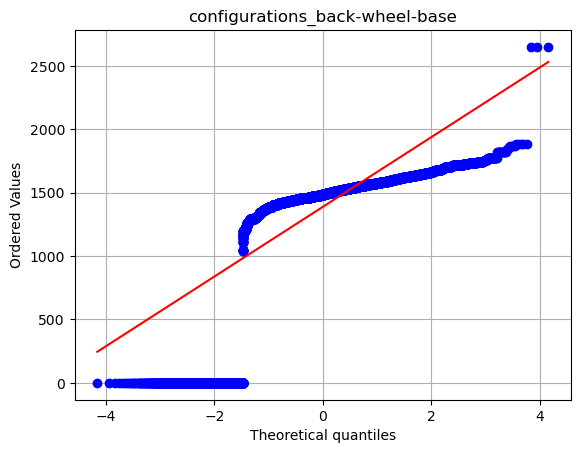

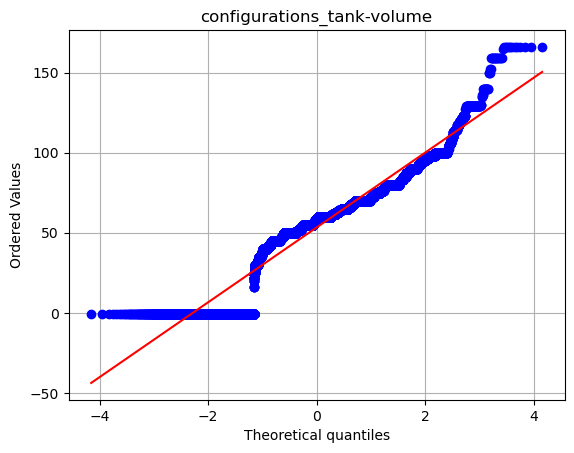

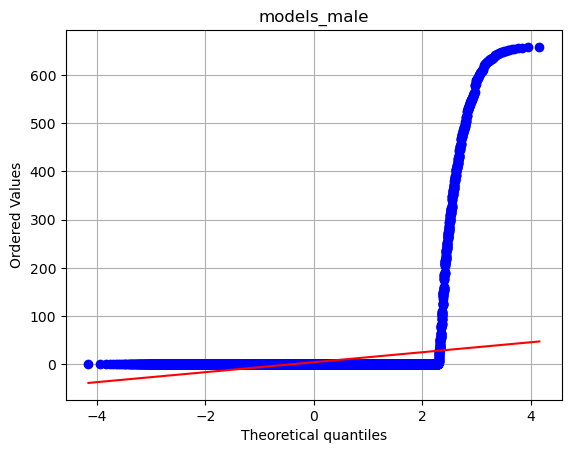

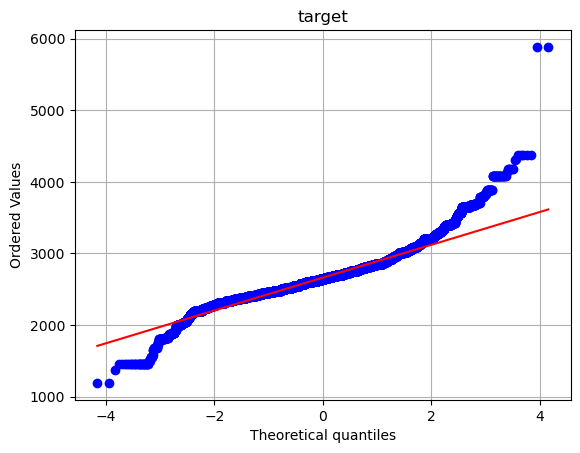

In [210]:
from scipy import stats as st
for i in list_new:
    st.probplot(df[i], dist='norm', plot=plt)
    plt.title(i)
    plt.grid(True)
    plt.show()

Как видно по графикам, есть выбросы. Распределения не имеют нормальный вид.

In [211]:
#удаляем выбросы
data = df
for i in list_new:
    data_new = df
    mu = data_new[i].mean() # среднее значение
    sigma = data_new[i].std() # стандартное отклонение
    # рассчитваем значение правого уса
    ej_h = mu + 3 * sigma
    ej_l = mu - 3 * sigma
  # выводим значение
    data_high = data_new[data_new[i] > ej_h]['index'].tolist()
    data_low = data_new[data_new[i] < ej_l]['index'].tolist()
    for h in data_high:
        data = data[data['index'] !=h]
    for l in data_low:
        data = data[data['index'] !=l]
data = data.reset_index(drop=True)

In [212]:
df = data
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37916,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
37917,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
37918,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
37919,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [213]:
del df['battery-capacity'] #удалим столбцы, в которых большая часть значений -1, что не соответсвует их описанию

In [214]:
del df['power-electro-kw']

In [215]:
#думала что можно сделать с отрицательными значениями, удалить их в данных столбцах - невозможно, так как из-за этого удалиться половина датасета. Заполнила по медиане, не уверена, что это хорошая идея, но оставила так
df.loc[df['max-speed'] == -1,'max-speed'] = df['max-speed'].median()
df.loc[df['consumption-mixed'] == -1, 'consumption-mixed'] = df['consumption-mixed'].median()

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


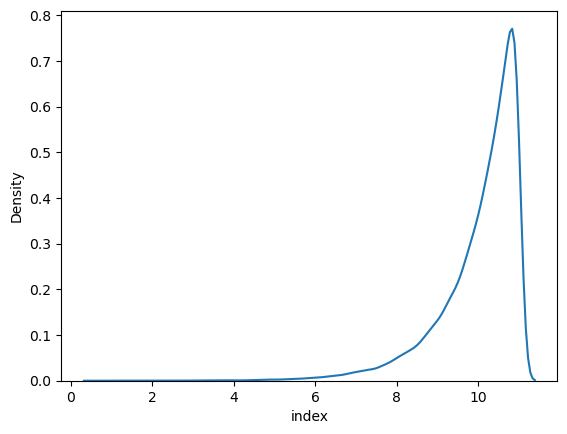

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


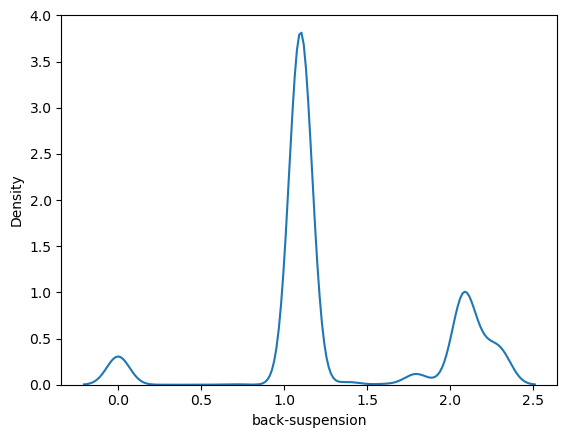

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


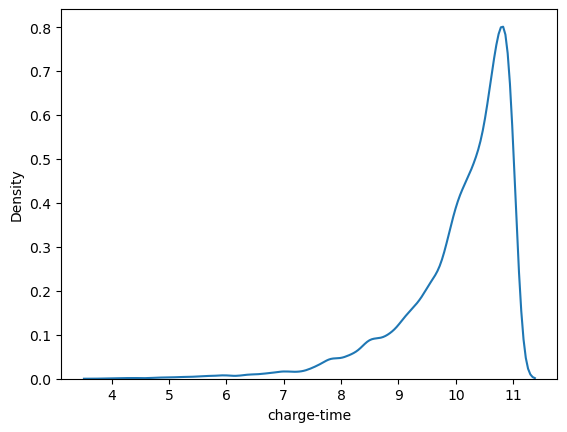

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


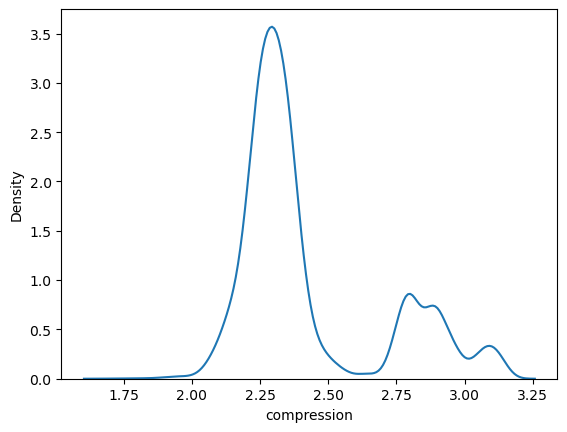

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


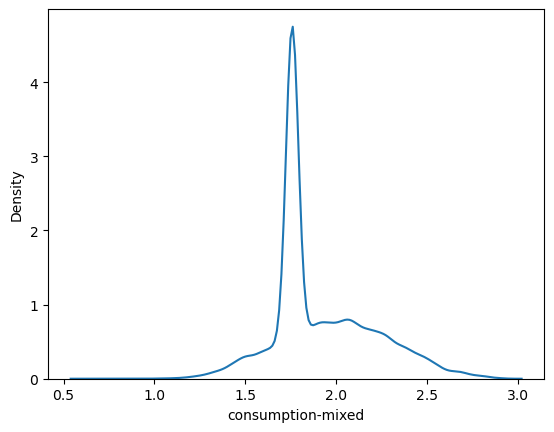

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


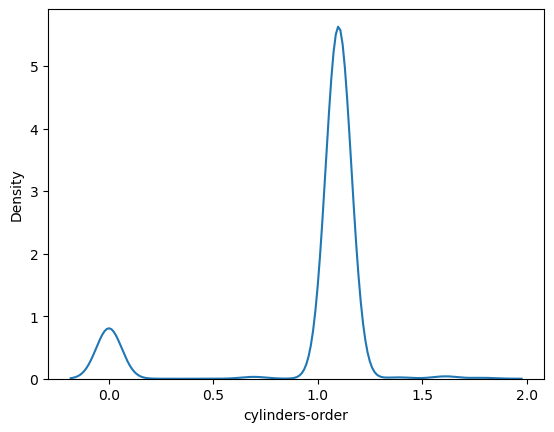

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


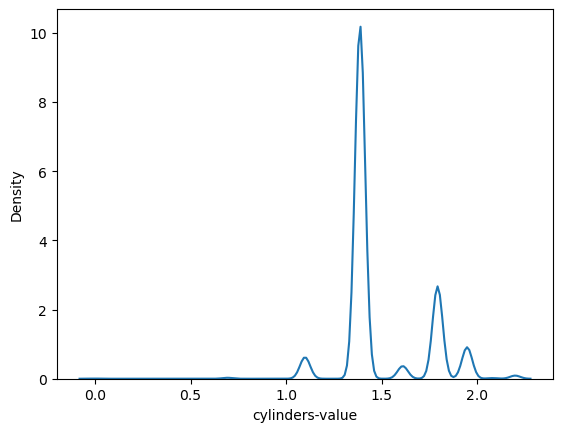

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


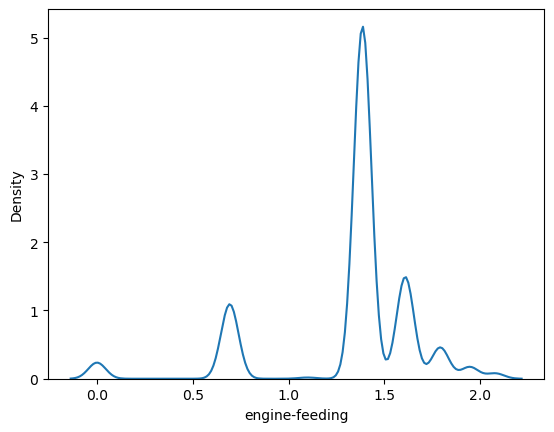

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


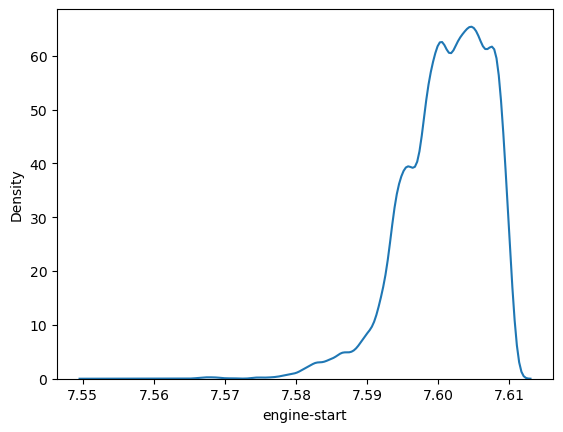

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


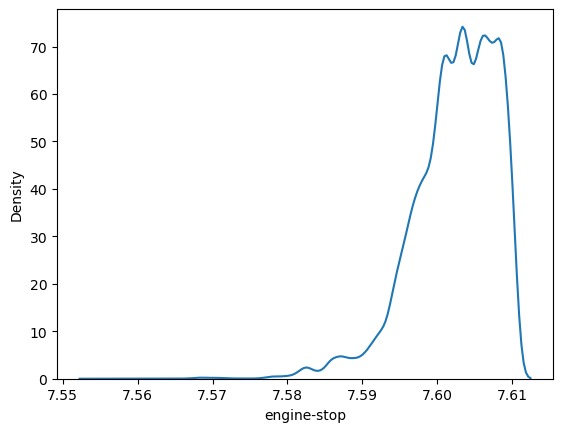

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


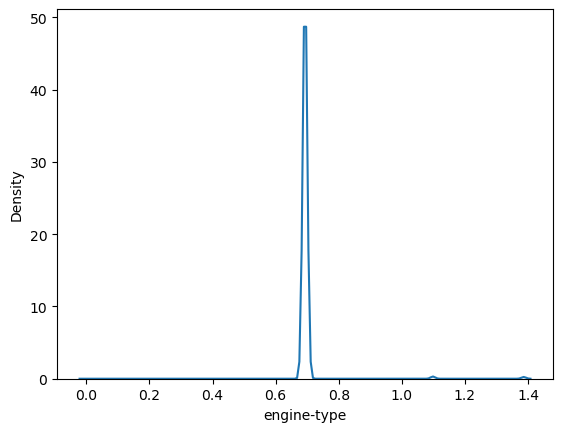

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


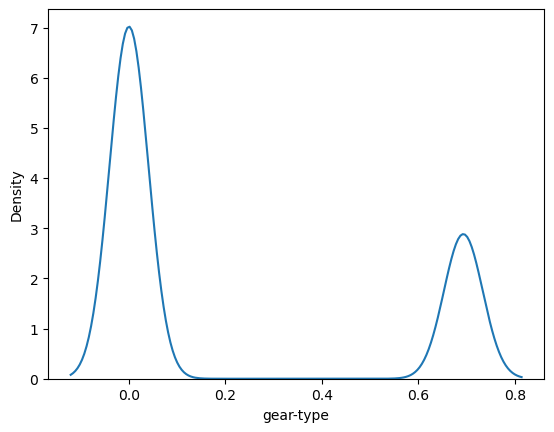

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


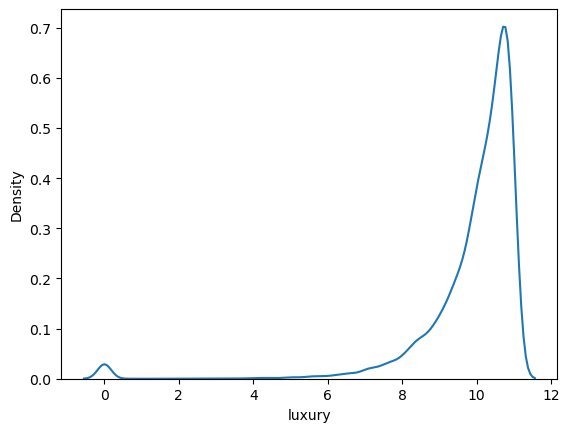

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


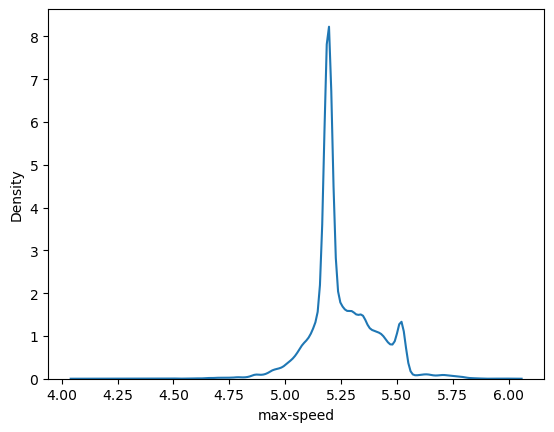

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


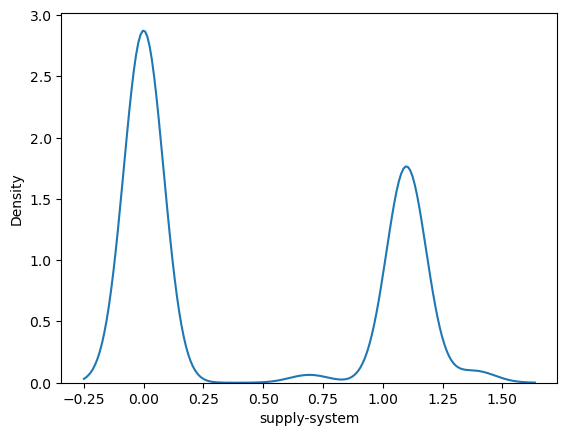

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


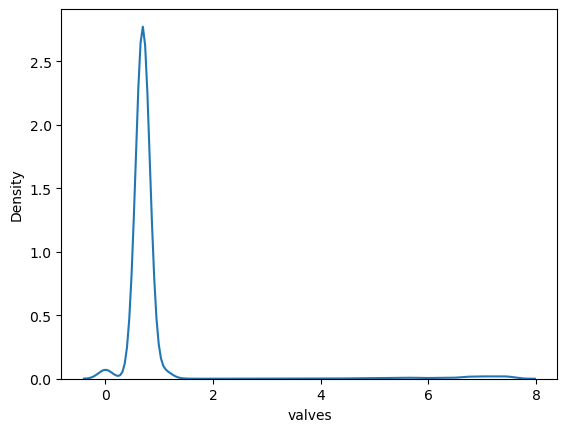

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


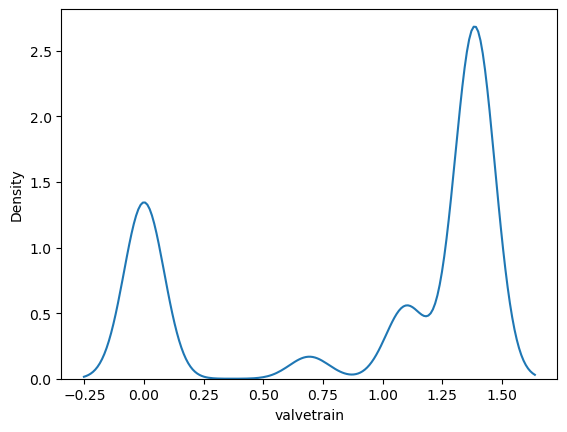

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


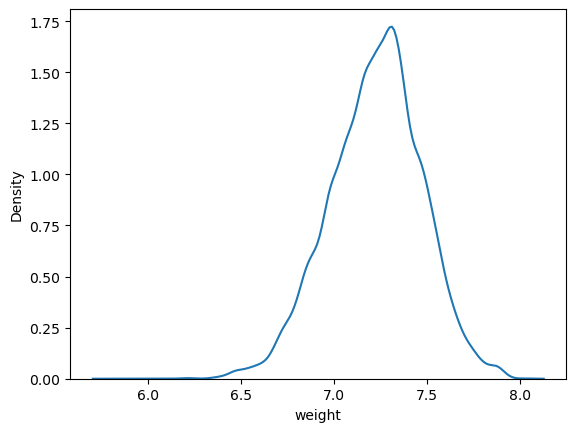

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


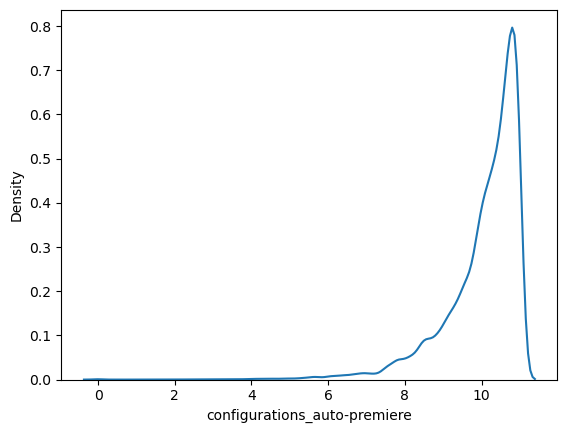

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


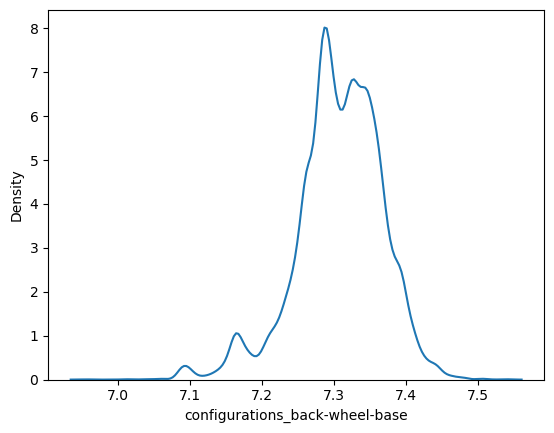

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


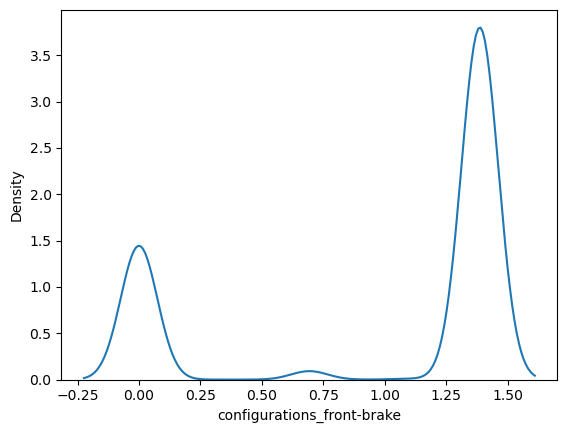

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


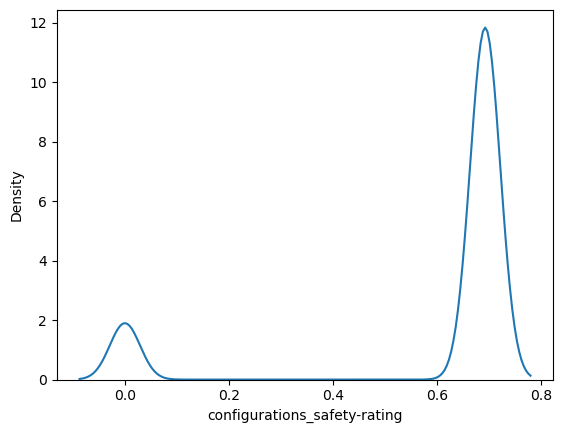

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


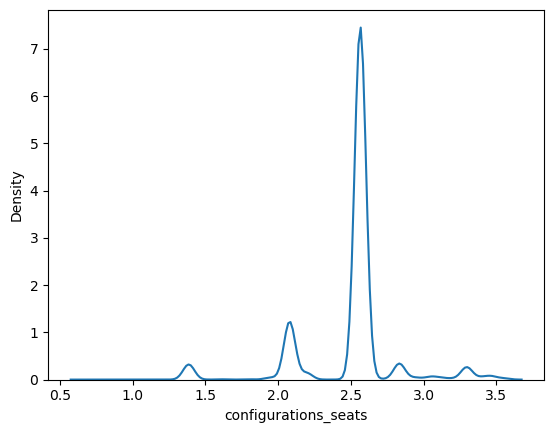

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


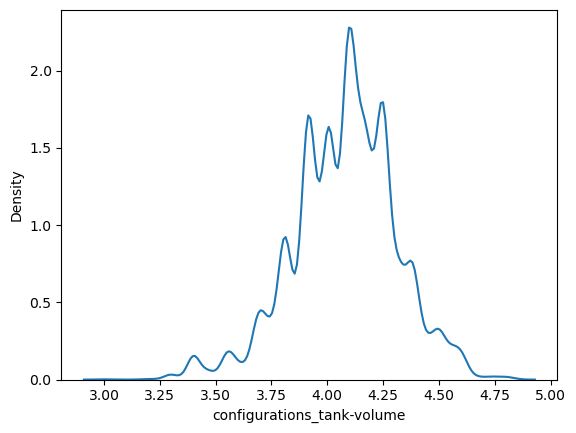

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


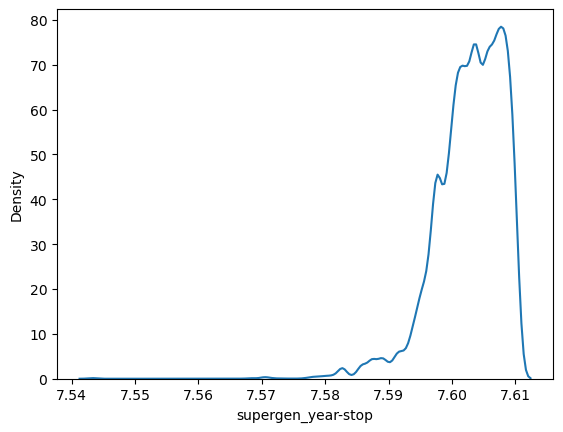

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


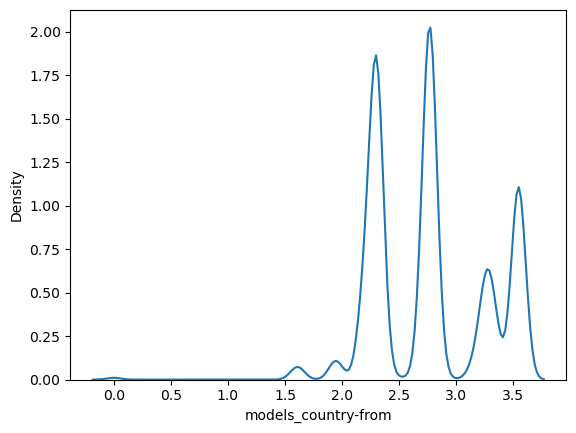

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


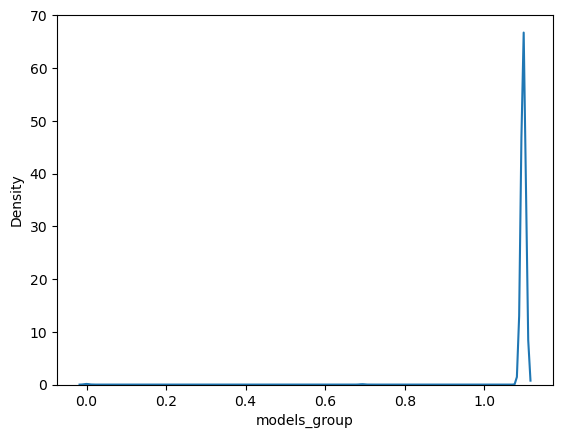

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


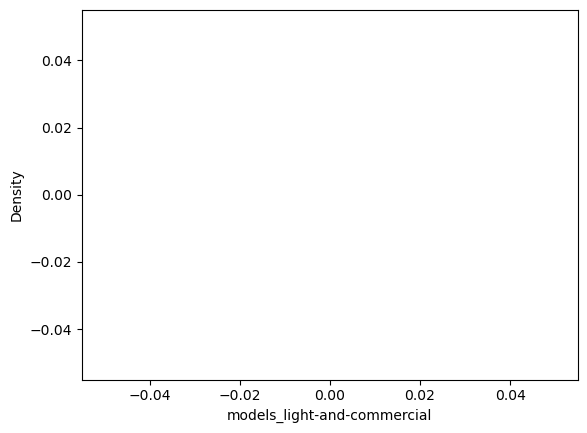

C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


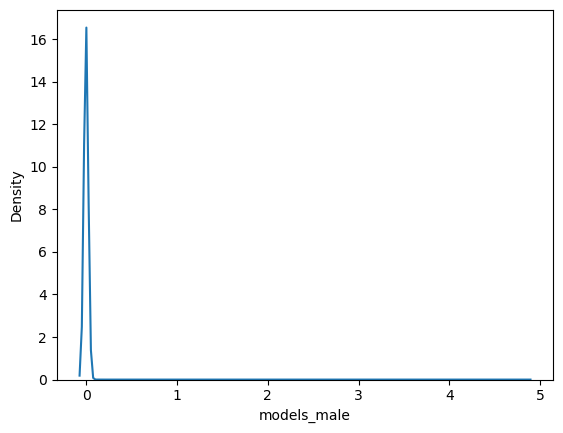

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


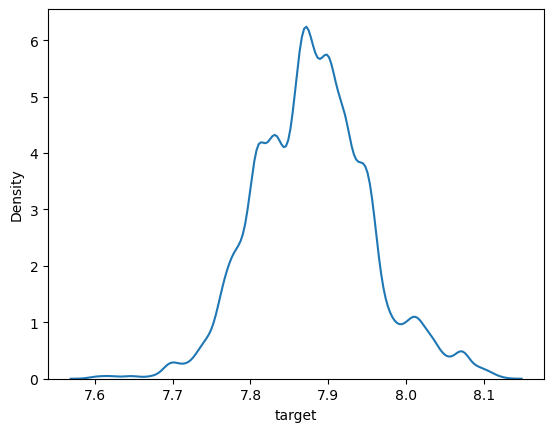

In [216]:
for i in df.columns.tolist():
    transformed_data = np.log(df[i]) 
    sns.distplot(transformed_data, hist=False, kde=True) #логарифмирование данных для нормализации 
    plt.show()

Как видно, логорифмизация данных не особо помогла приблизить распределения к нормальному виду.

## Baseline

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [218]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [219]:
reg = LinearRegression().fit(train_X, train_y)


In [220]:
reg.score(train_X, train_y)

0.6125298300629114

In [221]:
mean_squared_error(reg.predict(train_X), train_y)

14806.149760403681

In [222]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error')) #выделение еще отложенной выборки

In [184]:
scores

{'fit_time': array([0.02773237, 0.02154994, 0.02247286]),
 'score_time': array([0.00603843, 0.00538278, 0.00619316]),
 'test_score': array([-14550.01769346, -14624.66595616, -14874.46092919])}

In [185]:
mean_squared_error(reg.predict(test_X), test_y)

15321.741726200617

ВТОРОЙ СПОСОБ

In [99]:
x = df.drop(["target"], axis=1)
y = df[["target"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)


In [100]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# обучим нашу модель
model = Ridge()

model.fit(train_x, train_y)

print(model.coef_, model.intercept_)

predictions = model.predict(test_x)
# проверяем r2
r2 = r2_score(test_y, predictions) 
r2

[[-3.42357823e-05 -1.07651195e+00  2.88694060e-03 -6.25644208e-01
  -7.34071078e+00 -1.82344500e+00  1.23540680e+01 -4.71396505e+00
   3.72786635e-01 -1.67175275e-03 -8.89447109e+00  4.18991566e+01
  -2.13769517e-04  1.84696106e-01 -2.10728760e+00  5.79927711e-02
   4.10152086e-01  3.19333392e-02 -2.39765038e-03  9.49971035e-01
   1.12819422e+00  2.06624599e-01  1.01649624e+01  5.21993585e+00
  -4.95952775e-03 -7.98520633e-01 -1.59561128e+01  2.02067681e+02
   1.81468038e-01]] [18.65166078]


0.6951335427843055

In [101]:
r2 = r2_score(test_y, predictions)
r2

0.6951335427843055

In [102]:
mean_squared_error(model.predict(train_X), train_y)

9274.15024111644

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

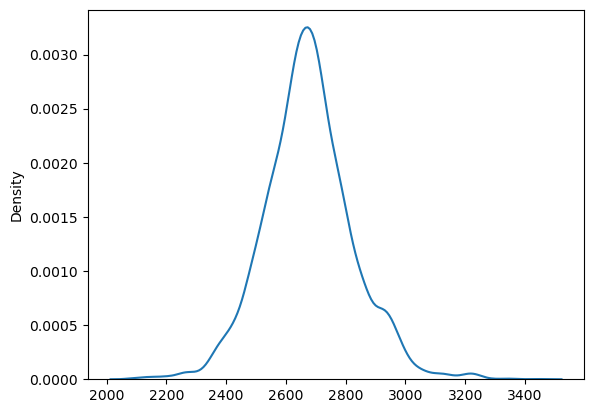

In [103]:
sns.distplot(predictions, hist=False , kde=True)

Таким образом, удалось сократить ошибку примерно в два раза и повысить коэфф. детерминации до 62%. Данный результат был получен путем удаления выбросов.